# Given

MNIST - a prerpocessed dataset of handwritten digits from 0 to 1, decoded in a matrix 20x20 flattened into 400 attributes.

Flattened preprocessed dataset:

| x1   | x2    | ... | x400 | y - Written number |
| ----------------| ------------------------ | ------------------------ | ------------------------ | ------------------------ |
| 3 | 1 | ...   | 0 | 0 |
| 1    | 0 | ...    | 1 | 1 |
| ...    | ... | ...    | ... | ... |


# Find

Using TensorFlow model and calculate the weights. Use these weights to replicate forward propagation in numpy.
Prove both models function the same by predicting similar values.


Use these TensorFlow model parameters:
   - Activation = sigmoid
   - Optimizator = Adam(learning_rate = 0.001)
   - Loss = BinaryCrossentropy
   - 2 sigmoid layers [x25->x15->x1]
   - Epochs = 10
   - Forward and back propagation (theory is discussed later)

# Solution

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Inputs

In [104]:
x = np.load("handwritten_X.npy")
y = np.load("handwritten_Y.npy")

x = x[:1000,:] # only 0 and 1
y = y[:1000,:]

x.shape, y.shape

((1000, 400), (1000, 1))

Examples

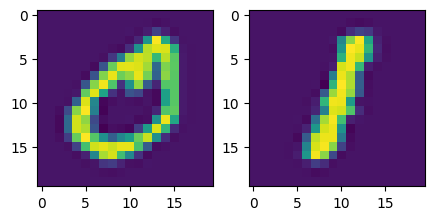

In [134]:
example0 = np.reshape(x[1],(20,20), order='F')
example1 = np.reshape(x[900],(20,20), order='F')

fig, ax = plt.subplots(1, 2, figsize=(5,4))
ax[0].imshow(example0)
ax[1].imshow(example1)

### Generate weights using Tensorflow Model

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 25, activation="sigmoid", input_dim=400, name="L1"), 
    tf.keras.layers.Dense(units = 15, activation="sigmoid", name = "L2"),
    tf.keras.layers.Dense(units = 1, activation="sigmoid", name = "L_out"),
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.BinaryCrossentropy()
)

model.fit(x,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 0.6329
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4709
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3091
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2023
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1421
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1069
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0844
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.0690
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0493


Print weights

In [135]:
l1_w, l1_b = model.get_layer("L1").get_weights()
l2_w, l2_b = model.get_layer("L2").get_weights()
l3_w, l3_b  = model.get_layer("L_out").get_weights()

print(f"input: {x.shape}")
print(f"l1_w: {l1_w.shape}, l1_b: {l1_b.shape} \n l2_w: {l2_w.shape}, l2_b: {l2_b.shape} \n l3_w: {l3_w.shape}, l3_b: {l3_b.shape}")

input: (1000, 400)
l1_w: (400, 25), l1_b: (25,) 
 l2_w: (25, 15), l2_b: (15,) 
 l3_w: (15, 1), l3_b: (1,)


### Define model in Numpy

In [141]:
def dense(x, w, b):

    f = np.dot(x, w) + b
    sigmoid = 1 / (1 + np.exp(-f))

    return sigmoid

In [144]:
def sequential(layers):
    
    layer = layers[0]
    result0 = dense(x, layer[0], layer[1])

    layer = layer[1]
    result1 = dense(result0, layer[0], [layer[1]])

    layer = layer[2]
    result2 = dense(result1, layer[0], [layer[1]])

    return result2

In [145]:
layers = np.array([[[l1_w],[l1_b]],[[l2_w],[l2_b]],[[l3_w],[l3_b]]])
sequential(layers)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (3, 2, 1) + inhomogeneous part.